<a href="https://colab.research.google.com/github/soumyaranjan23/Play-store-app-review-analysis/blob/main/Copy_of_Play_Store_App_Review_Analysis_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Play Store App Review Analysis 



##### **Project Type**    - EDA
##### **Contribution**    - Team
##### **Team Member 1 -** Soumya Ranjan Panigrahi
##### **Team Member 2 -** Vishal Sharma 
##### **Team Member 3 -** Amar Kumar Vishwakarma 
 **Team Member 4** - Resham Kumari


# **Project Summary -**


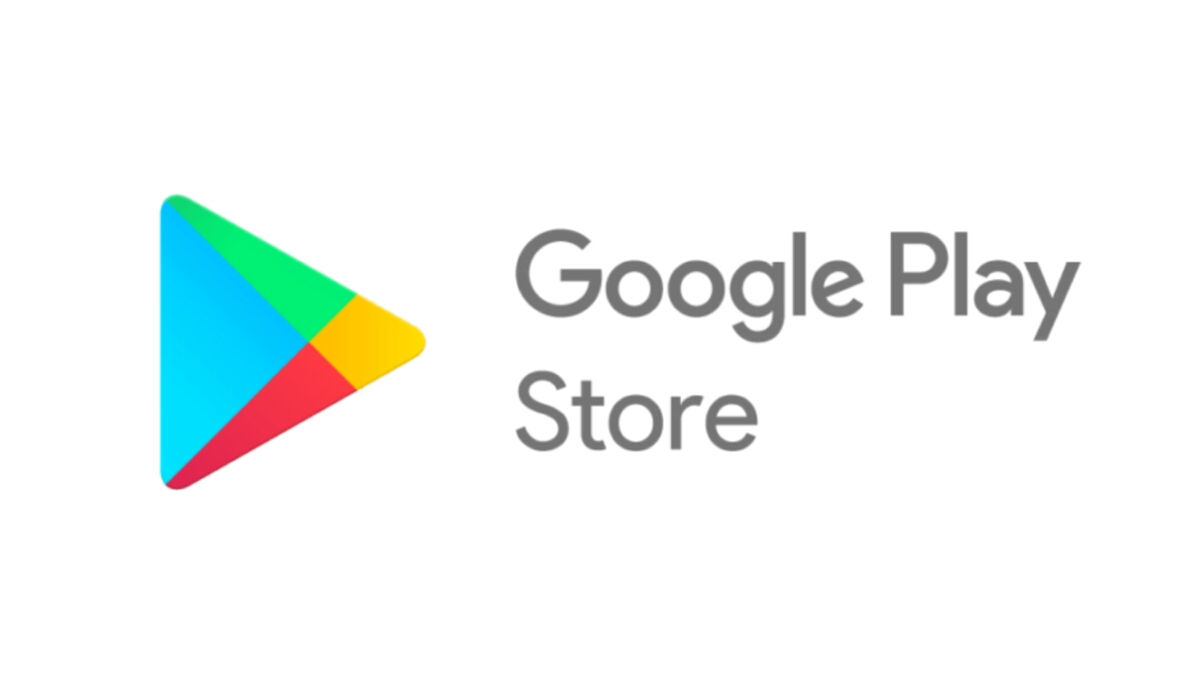


📱 **Hi everybody **!


In this notebook, I'm gonna analyze Google Play Store datas. While I was analyzing the data, I used Python. This study is my first data analyzing study.

Google Play Store apps and reviews Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.

Let's take a look at the data, which consists of two files:

> **playstore data.csv**: contains all the details of the applications on Google Play. There are 13 features that describe a given app.
> **user_reviews.csv**: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

Before jumping into the data's provided, let me first explain you about the EDA analysis.

# **GitHub Link -**

https://github.com/soumyaranjan23

# **Problem Statement**


1. What are the top categories on Play Store?
2. Are majority of the apps Paid or Free?
3. How importance is the rating of the application?
4. Which categories from the audience should the app be based on?
5. Which category has the most no. of installations?
6. How does the count of apps varies by Genres?
7. How does the last update has an effect on the rating?
8. How are ratings affected when the app is a paid one?
9. How are reviews and ratings co-related?
10. Lets us discuss the sentiment subjectivity.
11. Is subjectivity and polarity proportional to each other?
12. What is the percentage of review sentiments?
13. How is sentiment polarity varying for paid and free apps?
14. How Content Rating affect over the App?
15. Does Last Update date has an effects on rating?
16. Distribution of App update over the Year.
17. Distribution of Paid and Free app updated over the Month.

#### **Define Your Business Objective?**

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.

Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.

Explore and analyze the data to discover key factors responsible for app engagement and success.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
#import library
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
from datetime import datetime
# plotly
import plotly 
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
#sns.set(font_scale=1.5)
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
# Load Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
file_path = '/content/drive/MyDrive/AlmaBetter/Capstone Projects/Play Store app review analysis/Play Store Data/Play Store Data.csv'
ps_df=pd.read_csv(file_path)

### Dataset First View

In [ ]:
# Dataset First Look
play_store=pd.concat([ps_df.head(),ps_df.tail()])
play_store

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(ps_df.columns)
rows=ps_df.shape[0]
columns=ps_df.shape[1]
print(f"the number of rows is {rows} and number of columns is {columns}")

### Dataset Information

In [ ]:
# Dataset Info
ps_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
boolean = ps_df['App'].duplicated().any()
boolean

In [ ]:
ps_df['App'].value_counts()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
def playstoreinfo():
  temp=pd.DataFrame(index=ps_df.columns)
  temp["datatype"]=ps_df.dtypes
  temp["not null values"]=ps_df.count()
  temp["null values"]=ps_df.isnull().sum()
  temp["% of the null values"]=ps_df.isnull().mean()
  temp["unique count"]=ps_df.nunique()
  return temp 
playstoreinfo()

# **Findings**

`The number of null values are:`


Rating has 1474 null values which contributes 13.60% of the data. Type has 1 null value which contributes 0.01% of the data. Content_rating has 1 null value which contributes 0.01% of the data.Current_Ver has 8 null values which contributes 0.07% of the data.Android_ver has 3 null values which contribute 0.03% of the data.



In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(ps_df)

### What did you know about your dataset?

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets for patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset and summarize their main characteristics, often employing data visualization methods. It is an important step in any Data Analysis or Data Science project. It helps determine how best to manipulate data sources to get the answers you need.

EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better and make it more attractive and appealing.

The following are the various steps involved in the EDA process:

1. **Problem Statement** - We shall brainstorm and understand the given data set. We shall study the attributes present in it and try to do a philosophical analysis about their meaning and importance for this problem.
2. **Hypothesis** - Upon studying the attributes present in the data base, we shall develop some basic hypothesis on which we can work and play with the data to look for the varied results which we can get out of it.
3. **Univariate Analysis** - It is the simplest form of analyzing the data. In this we would initially pick up a single attribute and study it in and out. It doesn't deal with any sort of co-relation and it's major purpose is to describe. It takes data, summarizes that data and finds patterns in the data.
4. **Bivariate Analysis** - This analysis is related to cause and the relationship between the two attributes. We will try to understand the dependency of attributes on each other.
5. **Multivariate Analysis** - This is done when more than two variables have to be analyzed simultaneously.
6. **Data Cleaning** - We shall clean the dataset and handle the missing data, outliers and categorical variables.
7. Testing Hypothesis - We shall check if our data meets the assumptions required by most of the multivariate techniques.Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(ps_df.columns)
columns=ps_df.shape[1]
print(f"The number of columns is {columns}.")

In [ ]:
# Dataset Describe
ps_df.describe()

### Variables Description 

play_store dataframe has 10841 rows and 13 columns. The 13 columns are identified as below:

1. **App** - It tells us about the name of the application with a short description (optional).
2. **Category** - It gives the category to the app.
3. **Rating** - It contains the average rating the respective app received from its users.
4. **Reviews** - It tells us about the total number of users who have given a review for the application.
5. **Size** - It tells us about the size being occupied the application on the mobile phone.
6. **Installs** - It tells us about the total number of installs/downloads for an application.
7. **Type** - IIt states whether an app is free to use or paid.
8. **Price** - It gives the price payable to install the app. For free type apps, the price is zero.
9. **Content Rating** - It states whether or not an app is suitable for all age groups or not.
10. **Genres** - It tells us about the various other categories to which an application can belong.
11. **Last Updated** - It tells us about the when the application was updated.
12. **Current Ver** - It tells us about the current version of the application.
13. **Android Ver** - It tells us about the android version which can support the application on its platform.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
ps_df.nunique(axis=0)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
def playstoreinfo():
  temp=pd.DataFrame(index=ps_df.columns)
  temp["datatype"]=ps_df.dtypes
  temp["not null values"]=ps_df.count()
  temp["null values"]=ps_df.isnull().sum()
  temp["% of the null values"]=ps_df.isnull().mean()
  temp["unique count"]=ps_df.nunique()
  return temp 
playstoreinfo()


### What all manipulations have you done and insights you found?

 **Cleaning of the data**


The three features that we will be working with most frequently henceforth are Installs, Size, and Price. A careful glance of the dataset reveals that some of these columns mandate data cleaning in order to be consumed by code we'll write later. Specifically, the presence of special characters (, $ +) and letters (M k) in the Installs, Size, and Price columns make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.

Removing the Nan value and Duplicate present in the data set.

## 1.**`Android Ver: there are total of 3 NaN values in this column`**.

In [ ]:
# The rows containing NaN values in the Android Ver column
ps_df[ps_df["Android Ver"].isnull()]

In [ ]:
# Finding the different values the 'Android Ver' column takes
ps_df["Android Ver"].value_counts()

Since the NaN values in the Android Ver column cannot be replaced by any particular value and since there are only 3 rows which comtain NaN values in this column, which accounts to less than 0.03% of the total rows in the given dataset, it can be dropped.

In [ ]:
# dropping rows corresponding to the NaN values in the 'Android Ver' column.
ps_df=ps_df[ps_df['Android Ver'].notna()]
# shape of the updated dataframe
ps_df.shape

We were successfully able to handle the NaN values in the Android Ver column.

## 2. **`Current Ver: There are a total of 8 NaN values in this column`**.

In [ ]:
# The rows containing NaN values in the Current Ver column
ps_df[ps_df["Current Ver"].isnull()]

In [ ]:
# Finding the different values the 'Current Ver' column takes
ps_df['Current Ver'].value_counts()

Since there are only 8 rows which contain NaN values in the Current Ver column, and it accounts to just around 0.07% of the total rows in the given dataset, and there is no particular value with which we can replace it,these rows can be dropped.

In [ ]:
# Dropping rows corresponding to the values which contain NaN in the column 'Current Ver'
ps_df=ps_df[ps_df["Current Ver"].notna()]
# Shape of the updated dataframe 
ps_df.shape

## 3. **`Type: There is only one NaN value in this column.`**

In [ ]:
# The row containing NaN values in the Type column 
ps_df[ps_df["Type"].isnull()]

In [ ]:
# Finding the different values the 'Type' column takes 
ps_df["Type"].value_counts()

The `Type` column contains only two entries, namely, `Free` and `Paid`. Also, if the app is of `type-paid`, the price of that app will be printed in the corresponding `price` column else it will show as '0'. In this case the price for the respective app is printed as '0'. which means the app is of `type-free`. Hence we can replace this NaN value with free.

In [ ]:
# Replacing the NaN value in 'Type' column corresponding tp row index 9148 with 'Free'
ps_df.loc[9148,"Type"]='Free'

In [ ]:
ps_df[ps_df["Type"].isnull()]

## 4. **`Rating: This column contains 1470 Nan values`**.

In [ ]:
# The rows containing NaN values in the Rating column
ps_df[ps_df['Rating'].isnull()]

Also, we know that the rating of any app in the play store will be in between 1 and 5. Lets check whether there are any ratings out of tjis range.

In [ ]:
ps_df[(ps_df['Rating'] <1) | (ps_df['Rating']>5)]



*   The `Rating` column contains 1470 NaN values which acounts to approximately 13.5% of the rows in the entire dataset. It is not practical to drop these rows because by doing so, we will loose a large amount of data, which may impact the final quality of the analysis.
*   The NaN values in this case can be imputed by the aggregate (mean or median) of the remaining values in the Rating column.



In [ ]:
# Finding mean and median in the Rating column excluding the NaN values.
mean_rating = round(ps_df[~ps_df['Rating'].isnull()]['Rating'].mean(),4)
median_rating = ps_df[~ps_df['Rating'].isnull()]['Rating'].median()
[mean_rating , median_rating]

## Visualization of distribution of rating using displot and detecting the outliers through boxplot.

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(12,7))
sns.distplot(ps_df['Rating'],color='firebrick',ax=ax[0])
sns.boxplot(x='Rating',data=ps_df, ax=ax[1])



*   The mean of the average ratings(excluding the NaN values) comes to be 4.2.
*   The median of the entries(excluding the NaN values) in the 'Rating' column to be 4.3. from this we can say that 50% of the apps have an average rating of above 4.3, and the rest below 4.3.     

*   From the distplot visualizations, it is clear that the ratings are left skewed.
*   We know that if the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.

*   Hence we will impute the NaN values in the Rating column with its median.








In [ ]:
#Replacing the NaN values in the 'Rating' column with its median value
ps_df['Rating'].fillna(value=median_rating,inplace=True)

# **Handling duplicates values and Manipulating dtataset:**

## 1. `Handling the duplicates in the` **App** `column ` 

In [ ]:
# Handling the error values in the play store data 
ps_df.head()

In [ ]:
ps_df['App'].value_counts()

In [ ]:
# Inspecting the duplicate values.
ps_df[ps_df['App']=='ROBLOX']

In [ ]:
ps_df[ps_df.duplicated()]

In [ ]:
# dropping duplicates from the 'App' column.
ps_df.drop_duplicates(subset = 'App', inplace = True)
ps_df.shape

In [ ]:
# Checking whether the duplicates in the 'App' column are taken care of or not
ps_df[ps_df['App']=='ROBLOX']

We have successfully handled all the duplicates values in the App column.The resultant number of rows after dropping the duplicate rows in the app column out to be 9660.

## 2. `Changing the datatype of the Last Updated column from string to datetime.`



In [ ]:
# Pandas to datetime() function applied to the values in the last updated column helps to convert string date time into Python Date time object.
ps_df["Last Updated"] = pd.to_datetime(ps_df['Last Updated'])
ps_df.head()

# 3. `Changing the datatype of thePrice column from string to float.`

In [ ]:
ps_df['Price'].value_counts()

To convert this column from string to float, we must first drop the $ symbol from the all the values. Then we can assign float datatype to those values.

Applying the `drop_dollar` function to convert the values in thePrice column from string datatype to float datatype.

In [ ]:
# Creating a function drop-dollar which drops the $ symbol if it is present and returns the output which is of float datatype.
def convert_dollar(val):
  '''
  This function drops the $ symbol if present and returns value with float datatype.
  '''
  if'$' in val:
    return float(val[1:])
  else:
    return float(val)

In [ ]:
# The drop_dollar function applied to the price column
ps_df['Price']=ps_df['Price'].apply(lambda x: convert_dollar(x))
ps_df.head()

In [ ]:
ps_df[ps_df['Price']!=0].head()

We have successfully converted the datatype of values in the Price column from string to float.

# **4. `Converting the values in theInstallscolumn from string datatype to integer datatype`.**

In [ ]:
# Checking the contents of the 'Installs' column 
ps_df['Installs'].value_counts()

To convert all the values in the **Installs** column from string datatype to integer datatype, we must first drop the '+' symbol from all the entries if present and then we can change its datatype.

Applying the `convert_plus` function to convert the values in the `Installs` column from string datatype to float datatype.

In [ ]:
# Creating a function convert_plus which drops the '+' symbol if it is present and returns the output which is of integer datatype.
def convert_plus(val):
  '''
  This function drops the + symbol if present and returns value with int datatype.
  '''
  if'+' and ',' in val:
    new = int(val[:-1].replace(',',''))
    return new
  elif '+' in val:
    new1 = int(val[:-1])
    return new1
  else:
    return int(val)

In [ ]:
# The drop_plus function applied to the main dataframe 

ps_df['Installs'] = ps_df['Installs'].apply(lambda x: convert_plus(x))
ps_df.head()

The resultant values in the **Installs** column are of the integer datatype, and it represents the least number of times a particular app has been installed.



*   **Installs** = 0 indicates that that particular app has not been installed by anyone yet.
*   Installs = 1 indicates that the particular app has been installed by atleast one user.


*   **Installs** = 1000000 indicates that the particular app has been installed by atleast one million users. So on and so forth.
*   We have successfully converted the datatype of values in the Installs column from string to int.





# **`5. Converting the values in theSizecolumn to a same unit of measure(MB).`**

In [ ]:
ps_df['Size'].value_counts()

We can see that the values in the Size column contains data with different units. 'M' stands for MB and 'k' stands for KB. To easily analyse this column, it is necessary to convert all the values to a single unit. In this case, we will convert all the units to MB.

We know that 1MB = 1024KB, to convert KB to MB, we must divide all the values which are in KB by 1024.

In [ ]:
# Defining a function to convert all the entries in KB to MB and then converting them to float datatype.
def convert_kb_to_mb(val):
  '''
  This function converts all the valid entries in KB to MB and returns the result in float datatype.
  '''
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'K' in val:
      return round(float(val[:-1])/1024, 4)
    else:
      return val
  except:
    return val 

Applying the kb_to_mb function to convert the values in the Size column to a single unit of measure (MB) and the datatype from string to float.

In [ ]:
# The kb_to_mb function applied to the size column 
ps_df['Size'] = ps_df['Size'].apply(lambda x: convert_kb_to_mb(x))
ps_df.head()

# **`6. Converting the datatype of values in theReviewscolumn from string to int.`**

In [ ]:
# Converting the datatype of the values in the reviews column from string to int
ps_df['Reviews'] = ps_df['Reviews'].astype(int)
ps_df.head()

In [ ]:
ps_df.describe()

We have successfully converted the datatype of the values in the Reviews column from string to int.

Now that we have handled the errors and NaN values in the playstoredata.csv file, lets do the same for the userreviews.csv file

# *Exploring User_review dataframe*

In [ ]:
file_path = '/content/drive/MyDrive/AlmaBetter/Capstone Projects/Play Store app review analysis/User Reviews.csv'
ur_df=pd.read_csv(file_path)

In [ ]:
# Checking the top 10 rows of the data 
ur_df.head()

In [ ]:
ur_df.info()

In [ ]:
# Checking shape and column in dataframe 
print(ur_df.columns)
rows=ur_df.shape[0]
columns=ur_df.shape[1]
print(f"The number of rows is{rows} and number of columns is {columns}")

**Let us first define what information the columns contain based on our inspection**.

user_reviews dataframe has 64295 rows and 5 columns. The 5 columns are identified as follows:



*   **App**: Contains the name of the app with a short description (optional).
*   **Translated_Review**: It contains the English translation of the review dropped by the user of the app.

*   **Sentiment**: It gives the attitude/emotion of the writer. It can be ‘Positive’, ‘Negative’, or ‘Neutral’.
*   **Sentiment_Polarity**:  It gives the polarity of the review. Its range is [-1,1], where 1 means ‘Positive statement’ and -1 means a ‘Negative statement’

*   **Sentiment_Subjectivity**: This value gives how close a reviewers opinion is to the opinion of the general public. Its range is [0,1]. Higher the subjectivity, closer is the reviewers opinion to the opinion of the general public, and lower subjectivity indicates the review is more of a factual information.








In [ ]:
def Urinfo():
  temp1=pd.DataFrame(index=ur_df.columns)
  temp1["datatype"]=ur_df.dtypes
  temp1["not null values"]=ur_df.count()
  temp1["null value"]=ur_df.isnull().sum()
  temp1["% of the null value"] = ur_df.isnull().mean().round(4)*100
  temp1["unique count"]=ur_df.nunique()
  return temp1 
Urinfo()

**Findings**

The number of null values are:



*   **Translated_Review** has 26868 null values which contributes **41.79%** of the data.
*   **Sentiment** has 26863 null values which contributes **41.78%** of the data.

*   **Sentiment_Polarity** has 26863 null values which contributes **41.78%** of the data.
*   **Sentiment_Subjectivity** has 26863 null values which contributes **41.78%** of the data.




# **Handling the error and NaN values in the User reviews**

In [ ]:
# Finding the total no of NaN values in each column 
ur_df.isnull().sum()

There are a lot of NaN values. We need ro analyse these values and see how we can handle them.

In [ ]:
# checking the NaN values in the translated review column
ur_df[ur_df['Translated_Review'].isnull()]

There are a total of 26868 rows containing NaN values in the Translated_Review column.

We can say that the apps which do not have a review (NaN value insted) tend to have NaN values in the columns `Sentiment, Sentiment_Polarity, and Sentiment_Subjectivity` in the majority of the cases.

# **Lets check if there are any exceptions**.

In [ ]:
# The rows corresponding to the NaN values in the translated_review column, where the rest of the columns are non null.
ur_df[ur_df['Translated_Review'].isnull() & ur_df['Sentiment'].notna()]

In the few exceptional cases where the values of remaining columns are non null for null values in the translated_Review column, there seems to be errors. This is because the Sentiment, sentiment ploarity and sentiment subjectivity of the review can be determined if and only if there is a corresponding review.

Hence these values are wrong and can be deleted altogather.

In [ ]:
# Deleting the rows containing NaN values 
ur_df = ur_df.dropna()

In [ ]:
# The shape of the updated df
ur_df.shape

There are a total of 37427 rows in the updated df.

Hence we have taken care of all the NaN values in the df.

Lets inspect the updated df.

In [ ]:
# Inspecting the sentiment column 
ur_df['Sentiment'].value_counts()

The values in the `Sentiment_Polarity and Sentiment_Subjectivity` looks correct.

On the given datasets, we successfully developed a data pipeline. We can now examine this data flow and create user-friendly visuals. It is easy to compare different measures using the visualizations, and thus to draw implications from them.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

We have sucessfully cleaned the dirty data. Now we can perform some data visualization and come up with insights on the given datasets.

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

# **`1. Heat map`**

In [ ]:
merged_df = pd.merge(ps_df,ur_df, on='App', how="inner")

In [ ]:
def merged_dfinfo():
  temp = pd.DataFrame(index=merged_df.columns)
  temp['data_type'] = merged_df.dtypes
  temp["count of non null values"] = merged_df.count()
  temp['NaN values'] = merged_df.isnull().sum()
  temp['% Nan values'] = merged_df.isnull().mean()
  temp['unique_count'] = merged_df.nunique()
  return temp
merged_dfinfo()

In [ ]:
merged_df.corr()

In [ ]:
# Heatmap 
# Heat Map for the merged data frame 
plt.figure(figsize = (15,10))
sns.heatmap(merged_df.corr(), annot=True, cmap='Greens')
plt.title('Heatmap for merged DataFrame', size=20)

##### 1. Why did you pick the specific chart?

A heat map is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions.

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is a strong positive correlation between the Reviews and Installs column. This is pretty much obvious. Higher the number of installs, higher is the user base, and higher are the total number of reviews dropped by the users.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

# **`2. The Ratio of number of paid apps and free apps`**

In [ ]:
data = ps_df['Type'].value_counts()
labels = ['Free','Paid']

# create pie chart
plt.figure(figsize=(10,10))
colors = ["#00EE76","#7B8895"]
explode=(0.01,0.1)
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize':15})
plt.title('distribution of paid and free apps',size=15,loc='center')
plt.legend()

##### 1. Why did you pick the specific chart?

Pie chart is a way of summarizing a set of nominal data or displaying the different values of a given variable.

##### 2. What is/are the insight(s) found from the chart?

From the above graph we can see that 92% of apps in google play store are free and 8%are paid.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we saw from the above graph majority of people uses the free apps and less number people uses the paid app. So this is obvious more number of paid apps means less number of people.

In [ ]:
ps_df['Content Rating'].unique()

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

## **3. `Category of Apps from the content Rating column are found more on playstore`**

In [ ]:
# content rating of the apps
data = ps_df['Content Rating'].value_counts()
labels = ['Everyone','Teen','Everyone 10+','Mature 17+','Adults only 18+','Unrated']

# create pie chart
plt.figure(figsize=(10,10))
explode=(0,0.1,0.1,0.1,0.0,1.3)
colors = ['C4','r','c','g','m','k']
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize':15})
plt.title('Content Rating', size=20,loc='center')
plt.legend()

##### 1. Why did you pick the specific chart?

Pie chart is a way of summarizing a set of nominal data or displaying the different values of a given variable.

##### 2. What is/are the insight(s) found from the chart?

A majority of the apps (82%) in the play store are can be used by everyone.The remaining apps have various age restrictions to use it.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we saw from the above graph majority of apps can be used by everyone. so there is no such reasons that will lead to negative growth.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

# 4. **`Top categories on Google Playstore`**

In [ ]:
ps_df.groupby("Category")["App"].count().sort_values(ascending=False)

In [ ]:
x = ps_df['Category'].value_counts()
y = ps_df['Category'].value_counts().index
x_list = []
y_list = []
for i in range(len(x)):
  x_list.append(x[i])
  y_list.append(y[i])

In [ ]:
# Number of apps belongingto each category in the playstore
plt.figure(figsize=(20,10))
plt.xlabel('Number of Apps', size=15)
plt.ylabel('App Categories', size=15)
graph = sns.barplot(y = x_list, x = y_list, palette="tab10")
graph.set_title("Top categories on Playstore", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation=45, horizontalalignment='right',);

##### 1. Why did you pick the specific chart?

Bar plot presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

##### 2. What is/are the insight(s) found from the chart?

So there are all total 33 categories in the dataset From the above output we can come to a conclusion that in playstore most of the apps are under `FAMILY & GAME` category and least are of `EVENTS & BEAUTY` Category.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we saw from the above graph that most of the apps are in family and game categories.so most people use these categories only. so there may be a slight negative growth in case of events and beauty categories, which is negligible.

In [ ]:
# Percentage of apps belonging to each category in the playstore 
plt.figure(figsize=(18,18))
plt.pie(ps_df.Category.value_counts(), labels=ps_df.Category.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% of apps share in each Category', fontsize = 25)
plt.show()

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

# **`5. App's having most number of installs `**

In [ ]:
 # total app installs in each category of the play store

a = ps_df.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(15,10),color = 'c',)
plt.ylabel('Total app Installs', fontsize = 15)
plt.xlabel('App Categories', fontsize = 15)
plt.xticks()
plt.title('Total app Installs in each category', fontsize = 20) 

##### 1. Why did you pick the specific chart?

 Plot bar presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. 

##### 2. What is/are the insight(s) found from the chart?

This tells us the category of apps that has the maximum number of installs. The `Game`, `Communication and Tools` categories has the highest number of installs compared to other categories of apps.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights help creating a positive business impact.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

# **`6. Average rating of the apps`**

In [ ]:
# Average app rating
ps_df['Rating'].value_counts().plot.bar(figsize=(20,8), color = 'm' )
plt.xlabel('Average rating', fontsize = 15)
plt.ylabel('Number of apps', fontsize = 15)
plt.title('Average ratings of apps in playstore', fontsize = 20)
plt.legend()

 presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent:


*   4-5: Top rated 
*   3-4: Above average

*   2-3: Average
*  1-2: Below average





**Lets create a new column `Rating group` in the main dataframe and apply these filters**.

In [ ]:
# Defining a function grouped)rating to group the ratings as mentioned above
def Rating_app(val):
  '''
  This function help to categories the rating from 1to 5
  as Top_rated,Above_average & below Average
  '''
  if val>=4:
    return 'Top rated'
  elif val>3 and val<4:
    return'Above Average'
  elif val>2 and val<3:
    return 'Average'
  else:
    return 'Below Average' 

**Lets apply the `grouped_rating` function on the Rating column and save the output in new column named as Rating group in the main df.**

In [ ]:
# Applying grouped rating function
ps_df['Rating_group']=ps_df['Rating'].apply(lambda x: Rating_app(x))

In [ ]:
# Average app ratings
ps_df['Rating_group'].value_counts().plot.bar(figsize=(15,5), color = 'royalblue')
plt.xlabel('Rating Group', fontsize = 12)
plt.ylabel('Number of apps', fontsize = 12)
plt.title('Average app ratings', fontsize = 18)
plt.xticks(rotation=0)
plt.legend()

##### 1. Why did you pick the specific chart?

Bar plot presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

##### 2. What is/are the insight(s) found from the chart?


There are almost 7000 plus apps having highest ratings and so on. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we saw in the above graph that most of the apps having higher ratings so there is no lead to negative growth.                                                                                                                                                                                                                                                                                                                                                                                                   

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

# **`7. Top 10 installed apps in any category`**

In [ ]:
def findtop10incategory(str):
  str = str.upper()
  top10 = ps_df[ps_df['Category'] == str]
  top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
  plt.figure(figsize=(15,6), dpi=100)
  plt.title('Top 10 installed Apps', size = 20)
  graph = sns.barplot(x = top10apps.App, y = top10apps.Installs, palette="icefire")
  graph.set_xticklabels(graph.get_xticklabels(), rotation=45, horizontalalignment='right')

In [ ]:
findtop10incategory('GAME')

##### 1. Why did you pick the specific chart?

Bar plot presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent..

##### 2. What is/are the insight(s) found from the chart?

From the above graph we can see that in the Game category **`Subway Surfers,Candy Crush Saga, Temple Run 2`** has the highest installs. In the same way we by passing different category names to the function, we can get the top 10 installed apps.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we saw in the above graph Subway surfer can affect all other games in case of installation. 

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

# **`8. Top apps that are of free type.`**

In [ ]:
# Creating a df for only free apps
free_df = ps_df[ps_df['Type'] == 'Free']

In [ ]:
# Creating a df for top free apps 
top_free_df = free_df[free_df['Installs'] == free_df['Installs'].max()]
top10free_apps=top_free_df.nlargest(10, 'Installs', keep='first')
top10free_apps.head(10)


In [ ]:
# Top free apps 
top_free_df['App']

In [ ]:
# Categories in which the top 20 free apps belong to
top_free_df['Category'].value_counts().plot.bar(figsize=(20,6), color=('darkcyan','blueviolet'))
plt.xlabel('Category',size=15)
plt.ylabel('Number of apps', size=15)
plt.title('Categories in which the top 20 free apps belong', size=19)
plt.xticks(rotation=45)
plt.legend()

##### 1. Why did you pick the specific chart?

Plot bar presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent

##### 2. What is/are the insight(s) found from the chart?

Free apps that are related to communication has more downloads than others.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Communication apps has more positive business impact than others.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

# **`9. Top apps that are of paid type`**

In [ ]:
# Creating a df containing only paid apps
paid_df=ps_df[ps_df['Type']=='Paid']

In [ ]:
# Number of apps that can be installed at a particular price
paid_df.groupby('Price')['App'].count().sort_values(ascending=False).plot.bar(figsize = (20,6), color = 'crimson')



*   The paid apps charge the users a certain amount to download and install the app. This amount varies from one app to another.
*   There are a lot of apps that charge a small amount whereas some apps charge a larger amount. In this case the price to download an app varies from USD 0.99 to USD 400.

*   In order to select the top paid apps, it won't be fair to look just into the numer of installs. This is because the apps that charge a lower installation fee will be installed by more number of people in general.
*   Here a better way to determine the top apps in the paid category is by finding the revenue it generated through app installs.

*   This is given by:

Revenue generated through installs = (Number of installs)x(Price to install the app)







**Lets define a new column Revenue in paid_df which gives the revenue generated by the app through installs alone.**

In [ ]:
# Creating a new column 'Revenue' in paid_df
paid_df['Revenue'] = paid_df['Installs']*paid_df['Price']
paid_df.head()

In [ ]:
# Top app in the paid category
paid_df[paid_df['Revenue'] == paid_df['Revenue'].max()]

In [ ]:
# Top 10 paid apps in the play store
top10paid_apps=paid_df.nlargest(10, 'Revenue', keep='first')
top10paid_apps['App']

In [ ]:
# Categories in which the top 10 paid apps belong to
top10paid_apps['Category'].value_counts().plot.bar(figsize=(15,5), color=["orange", "red","green","blue","purple"])
plt.xlabel('Category',size=12)
plt.ylabel('Number of apps',size=12)
plt.title('Categories in which the top 10 paid apps belong',size=15)
plt.xticks(rotation=0)
plt.legend()

In [ ]:
# Top paid apps according to the revenue generated through installs alone
top10paid_apps.groupby('App')['Revenue'].mean().sort_values(ascending=True).plot.barh(figsize=(16,10),color='darkorange')
plt.xlabel('Revenue Generated (USD)', size=15)
plt.title('Top apps based on revenue generated through installation fee', size=20)
plt.legend()

In [ ]:
# Paid apps with the highest number of installs
paid_df[paid_df['Revenue'] == paid_df['Revenue'].max()]

##### 1. Why did you pick the specific chart?

Plot bar presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

##### 2. What is/are the insight(s) found from the chart?

Minecraft is the app whose revenue is much higher than all other apps in the playstore. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The above graph tells that higher the revenue higher the possitive business impact.

#### Chart - 10

In [ ]:
# chart - 10 visualization code

# **Data Visualization on User Reviews:**

# 1. **`Percentage of Review Sentiments`**

In [ ]:
# Basic inspection
ur_df.columns

In [ ]:
import matplotlib
counts = list(ur_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (10,15)
plt.pie(counts, labels=labels, explode=[0.01,0.05,0.05], shadow=True, autopct="%.2f%%")
plt.title('Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend(bbox_to_anchor=(0.9,0,0.5,1))
plt.show()

##### 1. Why did you pick the specific chart?

Pie chart is a way of summarizing a set of nominal data or displaying the different values of a given variable. 

##### 2. What is/are the insight(s) found from the chart?

We found that 
1. Positive reviews are 64.30%
2. Negative reviews are 22.80%
3. Neutral reviews are 12.90%

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Apps which got positive reviews will lead to positve business impact. and the apps which got Negative reviews and Neutral reviews will lead to negative growth.   

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

# 2.  **`Apps with the highest number of positive reviews`**

In [ ]:
# positive reviews 
positive_ur_df=ur_df[ur_df['Sentiment']=='Positive']
positive_ur_df

In [ ]:
positive_ur_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(10,8),color='seagreen').invert_yaxis()
plt.title("Top 10 positive review apps")
plt.xlabel('Totalnumber of positive reviews')
plt.legend()

##### 1. Why did you pick the specific chart?

Plot bar presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

##### 2. What is/are the insight(s) found from the chart?

As we saw in the above graph Helix Jump has the highest number of positive reviews while Dragon ball legend has lesser number of positive reviews in the top 10 list.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Higher number of positive reviews will lead to a positive business impact. 

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

# **`3. Apps with the highest number of negative reviews.`**

In [ ]:
negative_ur_df=ur_df[ur_df['Sentiment']=='Negative']
negative_ur_df

In [ ]:
negative_ur_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(15,8),color='crimson').invert_yaxis()
plt.title("Top 10 negative review apps")
plt.xlabel('Total number of negative reviews')
plt.legend()

##### 1. Why did you pick the specific chart?

Plot bar presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

##### 2. What is/are the insight(s) found from the chart?

Angry birds clasic has the highest number of Negative reviews while Agar.io has the lesser number of negative reviews in the Top 10 list.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Higher the number of negative reviews will lead to negative growth.

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

# **`4. Histogram of Subjectivity`**

In [ ]:
merged_df.Sentiment_Subjectivity.value_counts()

In [ ]:
plt.figure(figsize=(18,9))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(merged_df[merged_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is graph showing frequency distribution. It is a graph showing the number of observations within each given interval.

##### 2. What is/are the insight(s) found from the chart?

We found that:
0 - objective(fact), 1 - subjective(opinion)
it can be seen that maximum number of number sentiment subjectivity lies between 0.4 to 0.7 from this we can conclude that maximum number of users give reviews to the application according to their experience.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights will help in creating a positive business impact.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
ps_df.corr()

In [ ]:
# Heat map for play_store
plt.figure(figsize = (20,10))
sns.heatmap(ps_df.corr(), annot= True)
plt.title('Corelation Heatmap for Playstore Data', size=20)

**Let us check if there is any co-relation in both the dataframes.**

In [ ]:
merged_df = pd.merge(ps_df, ur_df, on='App', how = "inner")

In [ ]:
def merged_dfinfo():
  temp = pd.DataFrame(index=merged_df.columns)
  temp['data_type'] = merged_df.dtypes
  temp["count of non null values"] = merged_df.count()
  temp['NaN values'] = merged_df.isnull().sum()
  temp['% NaN values'] =merged_df.isnull().mean()
  temp['unique_count'] = merged_df.nunique() 
  return temp
merged_dfinfo()

In [ ]:
merged_df.corr()

In [ ]:
# Correlation heatmap
# Heat Map for the merged data frame
plt.figure(figsize = (15,10))
sns.heatmap(merged_df.corr(), annot= True, cmap='Greens')
plt.title(' Heatmap for merged Dataframe', size=20)

In [ ]:
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

In [ ]:
merged_df.head()

##### 1. Why did you pick the specific chart?

Because it visualizes the strength of relationship between numerical variables.

##### 2. What is/are the insight(s) found from the chart?



*   The `Price` is slightly negatively correlated with the `Rating, Reviews, and Installs`. This means that as the prices of the app increases, the average rating, total number of reviews and Installs fall slightly.
*   The `Rating` is slightly positively correlated with the `Installs and Reviews column`. This indicates that as the the average user rating increases, the app installs and number of reviews also increase.



#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code
Rating = ps_df['Rating']
Size = ps_df['Size']
Installs = ps_df['Installs']
Reviews = ps_df['Reviews']
Type = ps_df['Type']
Price = ps_df['Price']

p = sns.pairplot(pd.DataFrame(list(zip(Rating, Size, np.log(Installs), np.log10(Reviews), Price, Type)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Price','Type']), hue='Type')
p.fig.suptitle("Pairwise Plot - Rating, Size, Installs, Reviews, Price",x=0.5, y=1.0, fontsize=16)

##### 1. Why did you pick the specific chart?

**Pair plot** is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

##### 2. What is/are the insight(s) found from the chart?

we found that:


*   Most of the App are Free.
*   Most of the Paid Apps have Rating around 4

*   As the number of installation increases the number of reviews of the particaular app also increases.





## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Business objectives are a written explanation of your goals as a business. Business objectives usually have to do with the most important operating factors of a company's success, such as revenue, operations, productivity and growth. To be most successful, some companies find that a business objective needs to be specific, measurable, attainable and time-based. Large and small businesses alike might find value in developing written business objectives.


In this project of analyzing play store applications, we have worked on several parameters which would help the client to do well in launching their apps on the play store.

In the initial phase, we focused more on the problem statements and data cleaning, in order to ensure that we give them the best results out of our analysis.

Client needs to focus more on:

1. Developing apps related to the least categories as they are not explored much. Like events and beauty.
2. Most of the apps are Free, so focusing on free app is more important.
3. Focusing more on content available for Everyone will increase the chances of getting the highest installs.
4. They need to focus on updating their apps regularly, so that it will attract more users.
5. They need to keep in mind that the sentiments of the user keep varying as they keep using the app, so they should focus more on users needs and features.

# **Conclusion**

After analyzing the data we concluded that:



*  Percentage of free apps = ~92%
*  Percentage of apps with no age restrictions = ~82%
* Most competitive category: Family
* Category with the highest average app installs: Game
* Percentage of apps that are top rated = ~80%
* Family, Game and Tools are top three categories having 1906, 926 and 829 app count.
* Tools, Entertainment, Education, Buisness and Medical are top Genres.
* 8783 Apps are having size less than 50 MB. 7749 Apps are having rating more than 4.0 including both type of apps.
* There are 20 free apps that have been installed over a billion times.
* Minecraft is the only app in the paid category with over 10M installs. This app has also produced the most revenue only from the installation fee.
* Category in which the paid apps have the highest average installation fee: Finance
* The median size of all apps in the play store is 12 MB.
* The apps whose size varies with device has the highest number average app installs.
* The apps whose size is greater than 90 MB has the highest number of average user reviews, ie, they are more popular than the rest.
* Helix Jump has the highest number of positive reviews and Angry Birds Classic has the highest number of negative reviews.
* Overall sentiment count of merged dataset in which Positive sentiment count is 64%, Negative 22% and Neutral 13%.

1.**Rating**

Most of the apps have rating in between 4 and 5.

Most numbers of apps are rated at 4.3

Categories of apps have more than 4 average rating.item

2.**Size**

Maximum number of applications present in the dataset are of small size.

3.**Installs**

Majority of the apps come into these three categories, Family, Game, and Tools.

Maximum number of apps present in google play store come under Family, Game and tools but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Game, Communication, Productivity and Social.

Subway Surfers, Facebook, Messenger and Google Drive are the most installed apps.

4.**Type(Free/Paid)**

About 92% apps are free and 8% apps are of paid type.

The category ‘Family’ has the highest number of paid apps.

Free apps are installed more than paid apps.

The app “I’m Rich — Trump Edition” from the category ‘Lifestyle’ is the most costly app priced at $400

5.**Content Rating**

Content having Everyone only has most installs, while unrated and Adults only 18+ have less installs.

6.**Reviews**

Number of installs is positively correlated with reviews with correlation 0.64. Sentiment Analysis

7.**Sentiment**

Most of the reviews are of Positive Sentiment, while Negative and Neutral have low number of reviews.

8.**Sentiment Polarity / Sentiment Subjectivity**

Collection of reviews shows a wide range of subjectivity and most of the reviews fall in [-0.50,0.75] polarity scale implying that the extremely negative or positive sentiments are significantly low. Most of the reviews show a mid-range of negative and positive sentiments.

Sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low.

Sentiment Polarity is not highly correlated with Sentiment Subjectivity.




### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***